# Generating graphs of E vs. t, B vs. t, and V vs. t for varying values of M and D*

## B0 = 0.3 * eps * V0 * Dstar ^(-1/2)
## N0 = 1, P0 = 0

## Graphs

## M = 10^3, D* = 10 (-5)

In [12]:
M1 = 10 ** 3
Dstar1 = 10 ** (-5)
initial_B1 = 0.3 * eps * std * (Dstar1 ** (-1/2))

deltaT1 = fundeltaT(num_bins, M1, dTau)
V1 = funV(std, deltaT1, eqmean, Tr)
Amp1, amptime1, E1 = funB_E(Dstar1, dTau, initial_B1, N0, P0, deltaT1, M1, eps, V1, initial_u)

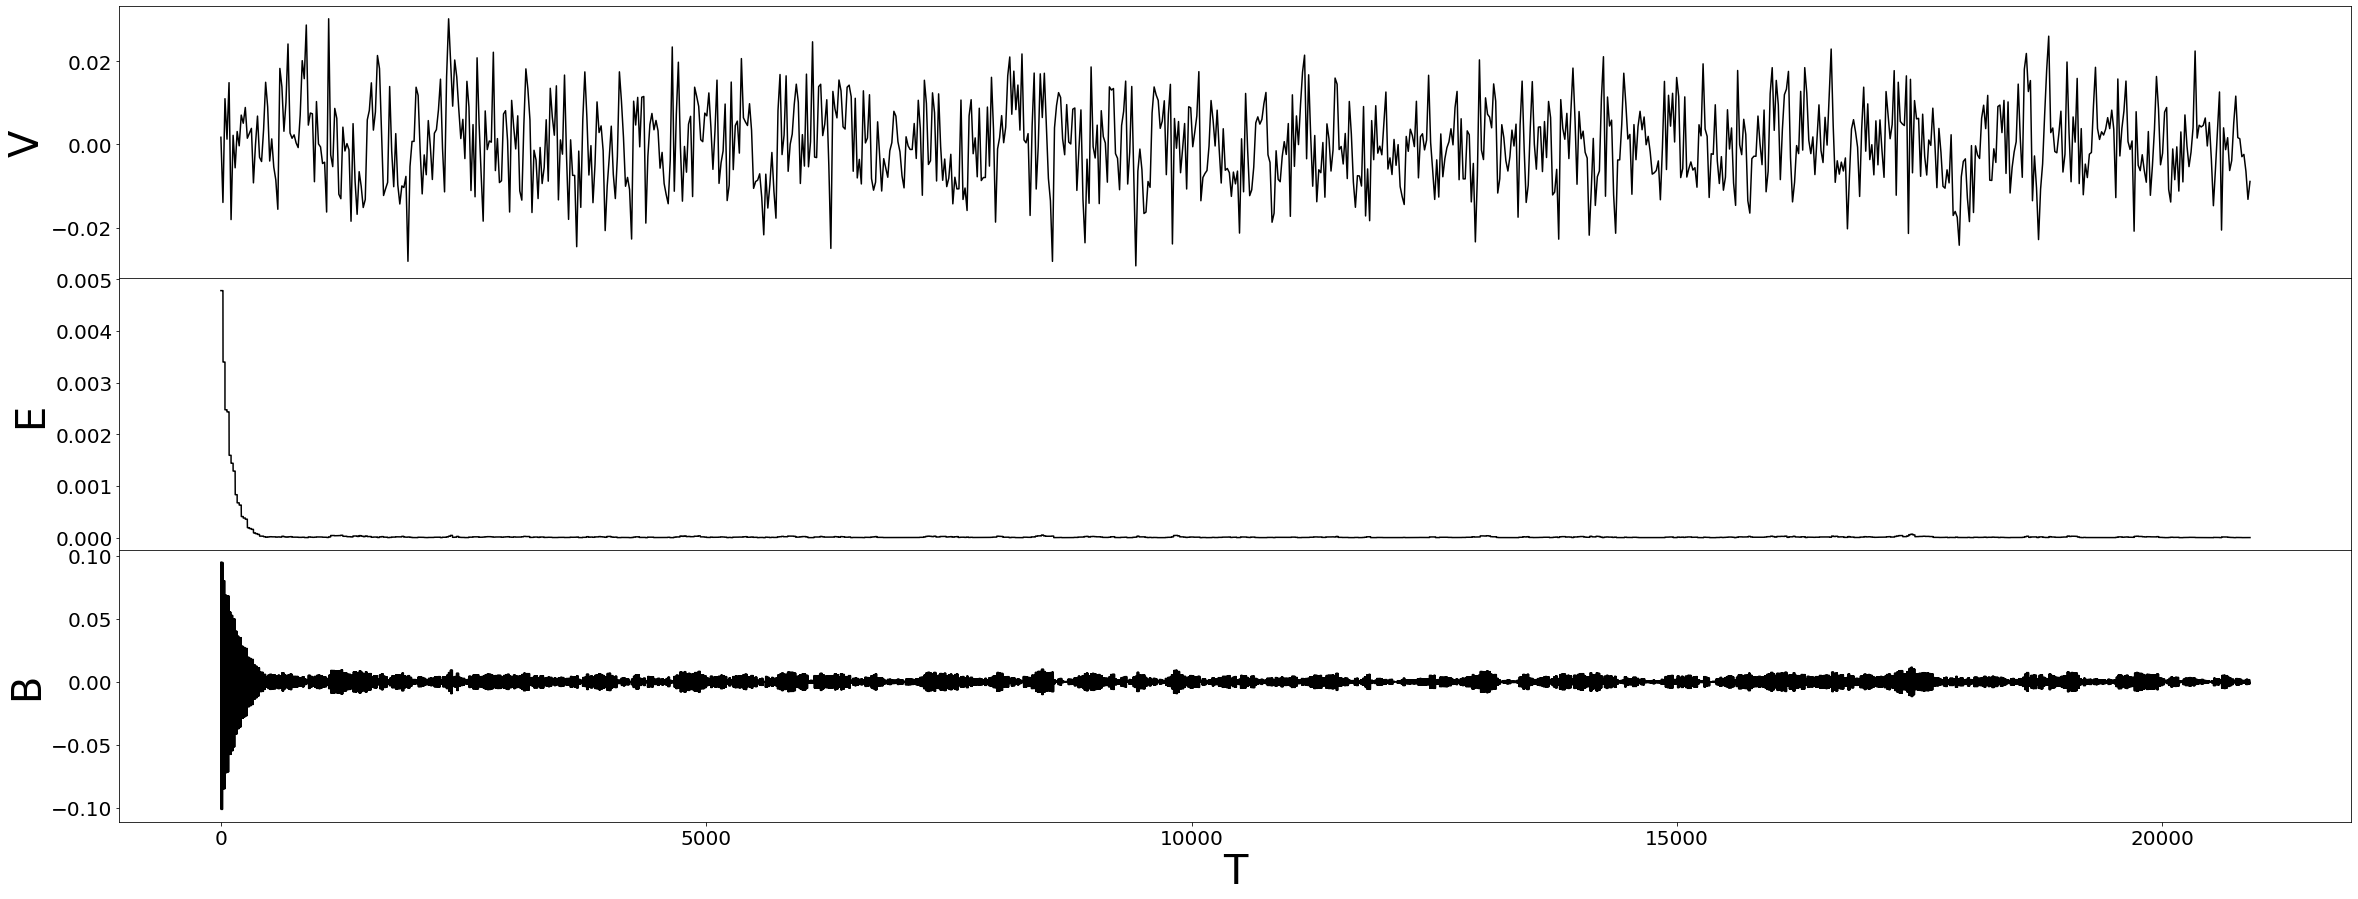

In [13]:
funplots(amptime1, E1, Amp1, V1, M1)

## M = 10 ^ 3, D* = 10 ^(-6)

In [14]:
M2 = 10 ** 3
Dstar2 = 10 ** (-6)
initial_B2 = 0.3 * eps * std * (Dstar2 ** (-1/2))

deltaT2 = fundeltaT(num_bins, M1, dTau)
V2 = funV(std, deltaT2, eqmean, Tr)
Amp2, amptime2, E2 = funB_E(Dstar2, dTau, initial_B2, N0, P0, deltaT2, M1, eps, V2, initial_u)

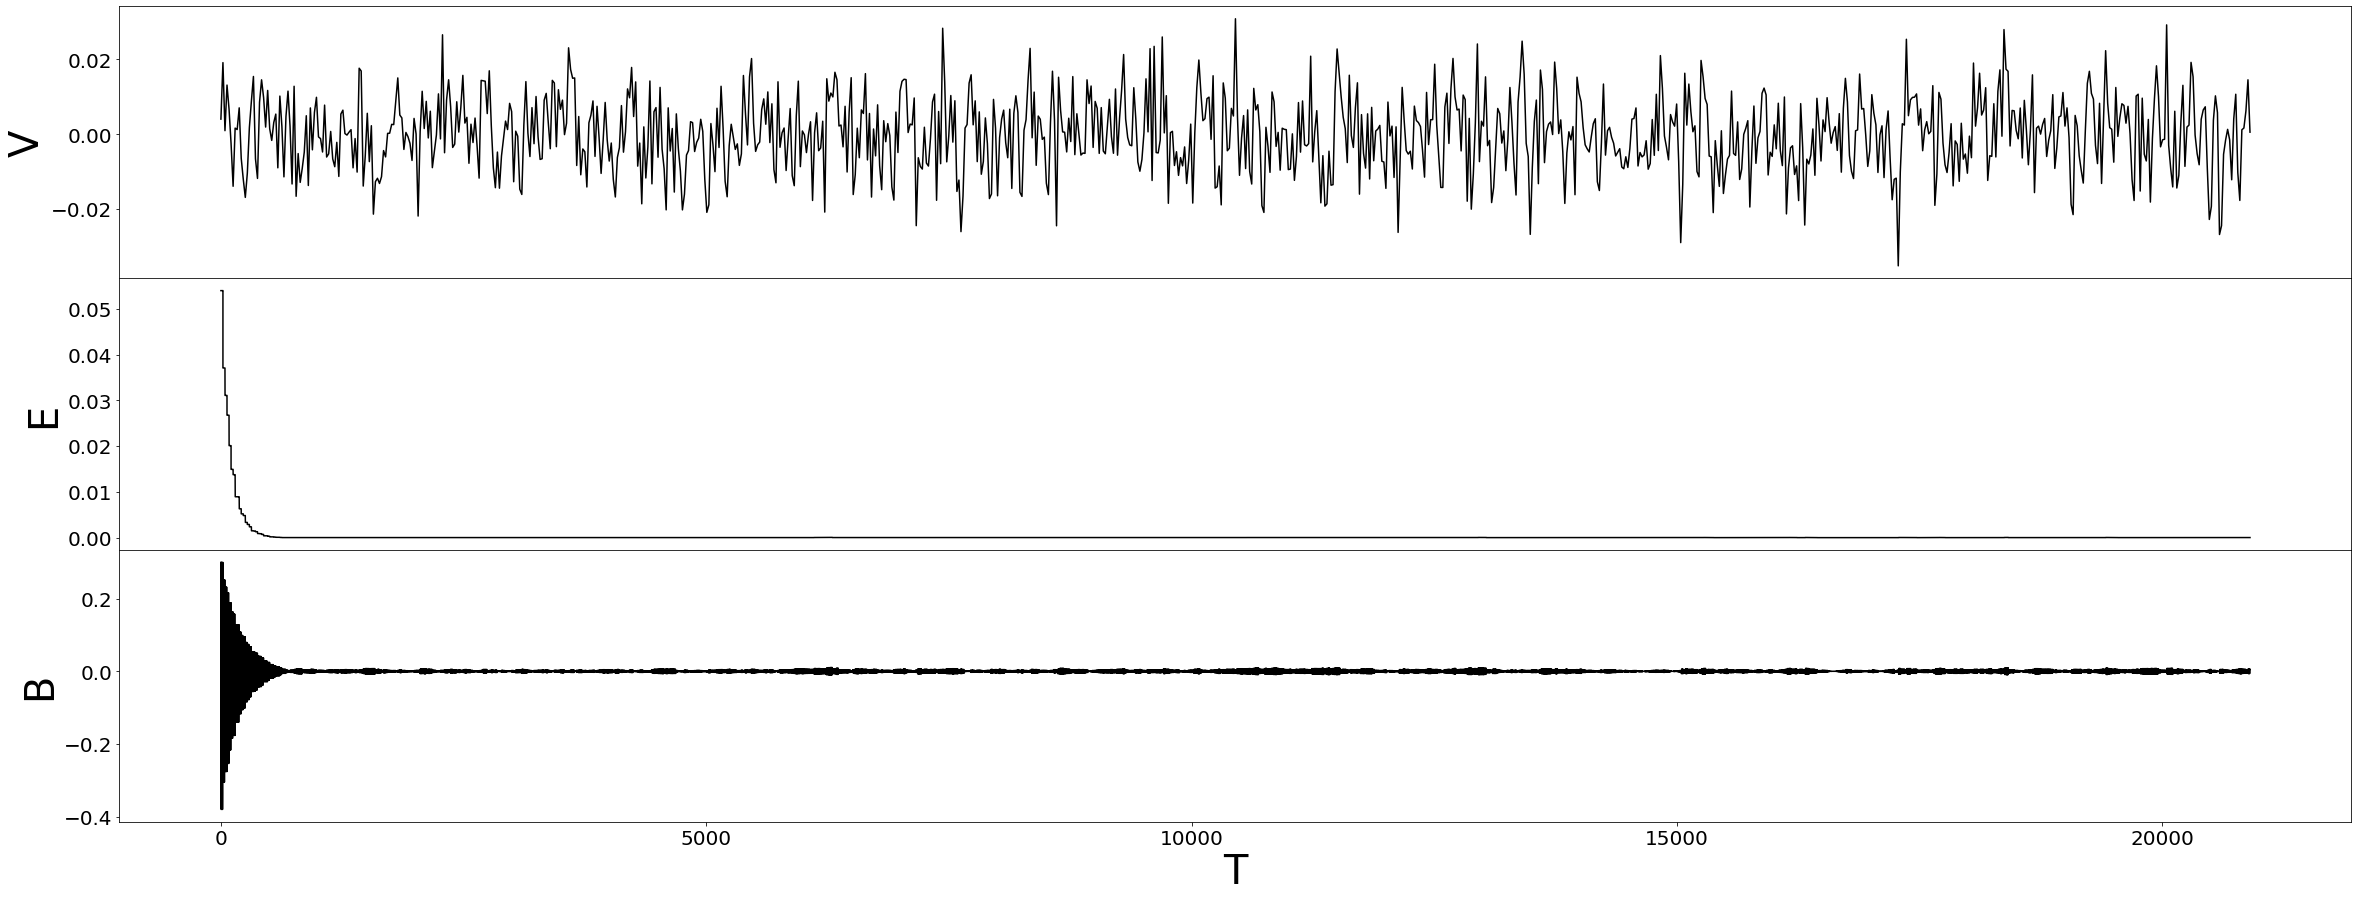

In [16]:
funplots(amptime2, E2, Amp2, V2, M2)

## M = 10 ^4, D* = 10 ^(-5)

In [17]:
M3 = 10 ** 4
Dstar3 = 10 ** (-6)
initial_B3 = 0.3 * eps * std * (Dstar3 ** (-1/2))

deltaT3 = fundeltaT(num_bins, M3, dTau)
V3 = funV(std, deltaT3, eqmean, Tr)
Amp3, amptime3, E3 = funB_E(Dstar3, dTau, initial_B3, N0, P0, deltaT3, M3, eps, V3, initial_u)

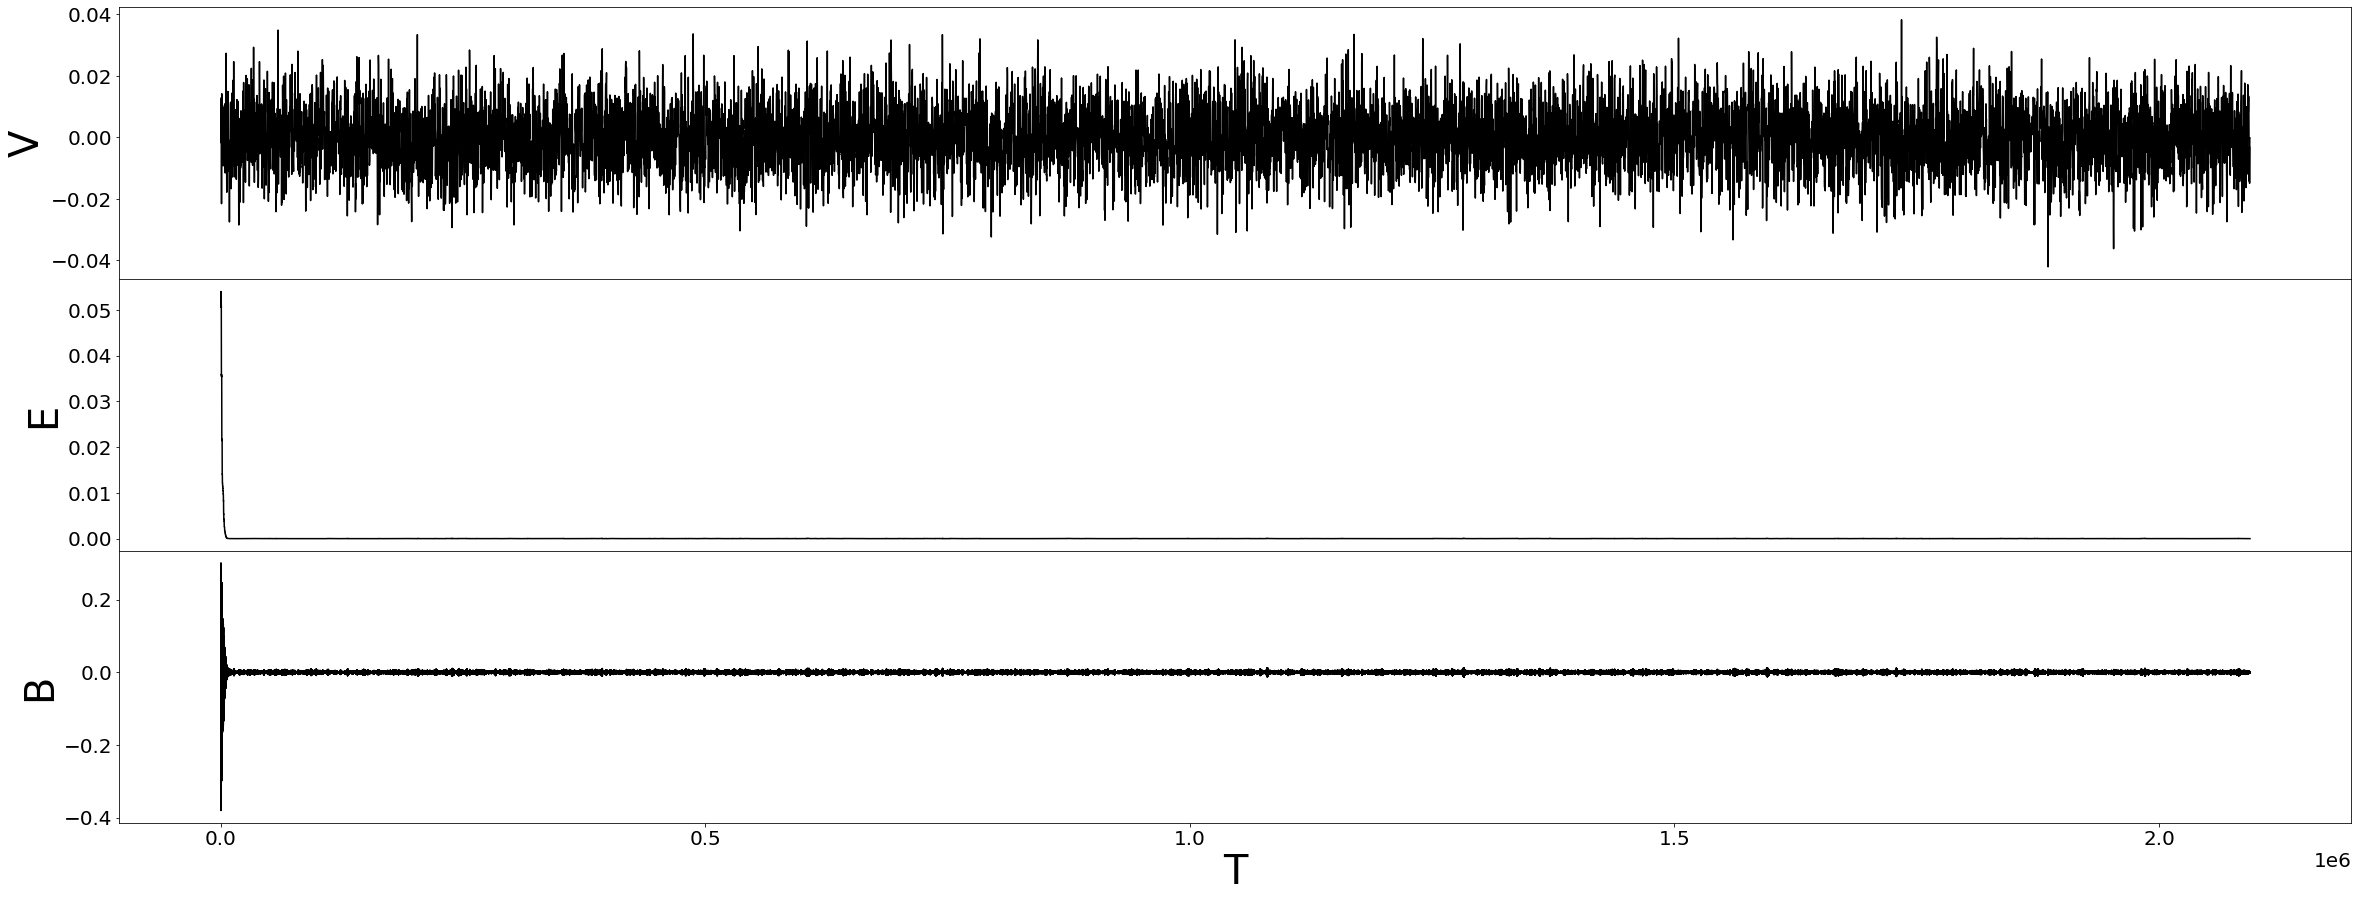

In [18]:
funplots(amptime3, E3, Amp3, V3, M3)

## M = 10 ^4, D* = 10 ^(-6)

In [10]:
M4 = 10 ** 4
Dstar4 = 10 ** (-6)
initial_B4 = 0.3 * eps * std * (Dstar4 ** (-1/2))

deltaT4 = fundeltaT(num_bins, M4, dTau)
V4 = funV(std, deltaT4, eqmean, Tr)
Amp4, amptime4, E4 = funB_E(Dstar4, dTau, initial_B4, N0, P0, deltaT4, M4, eps, V4, initial_u)

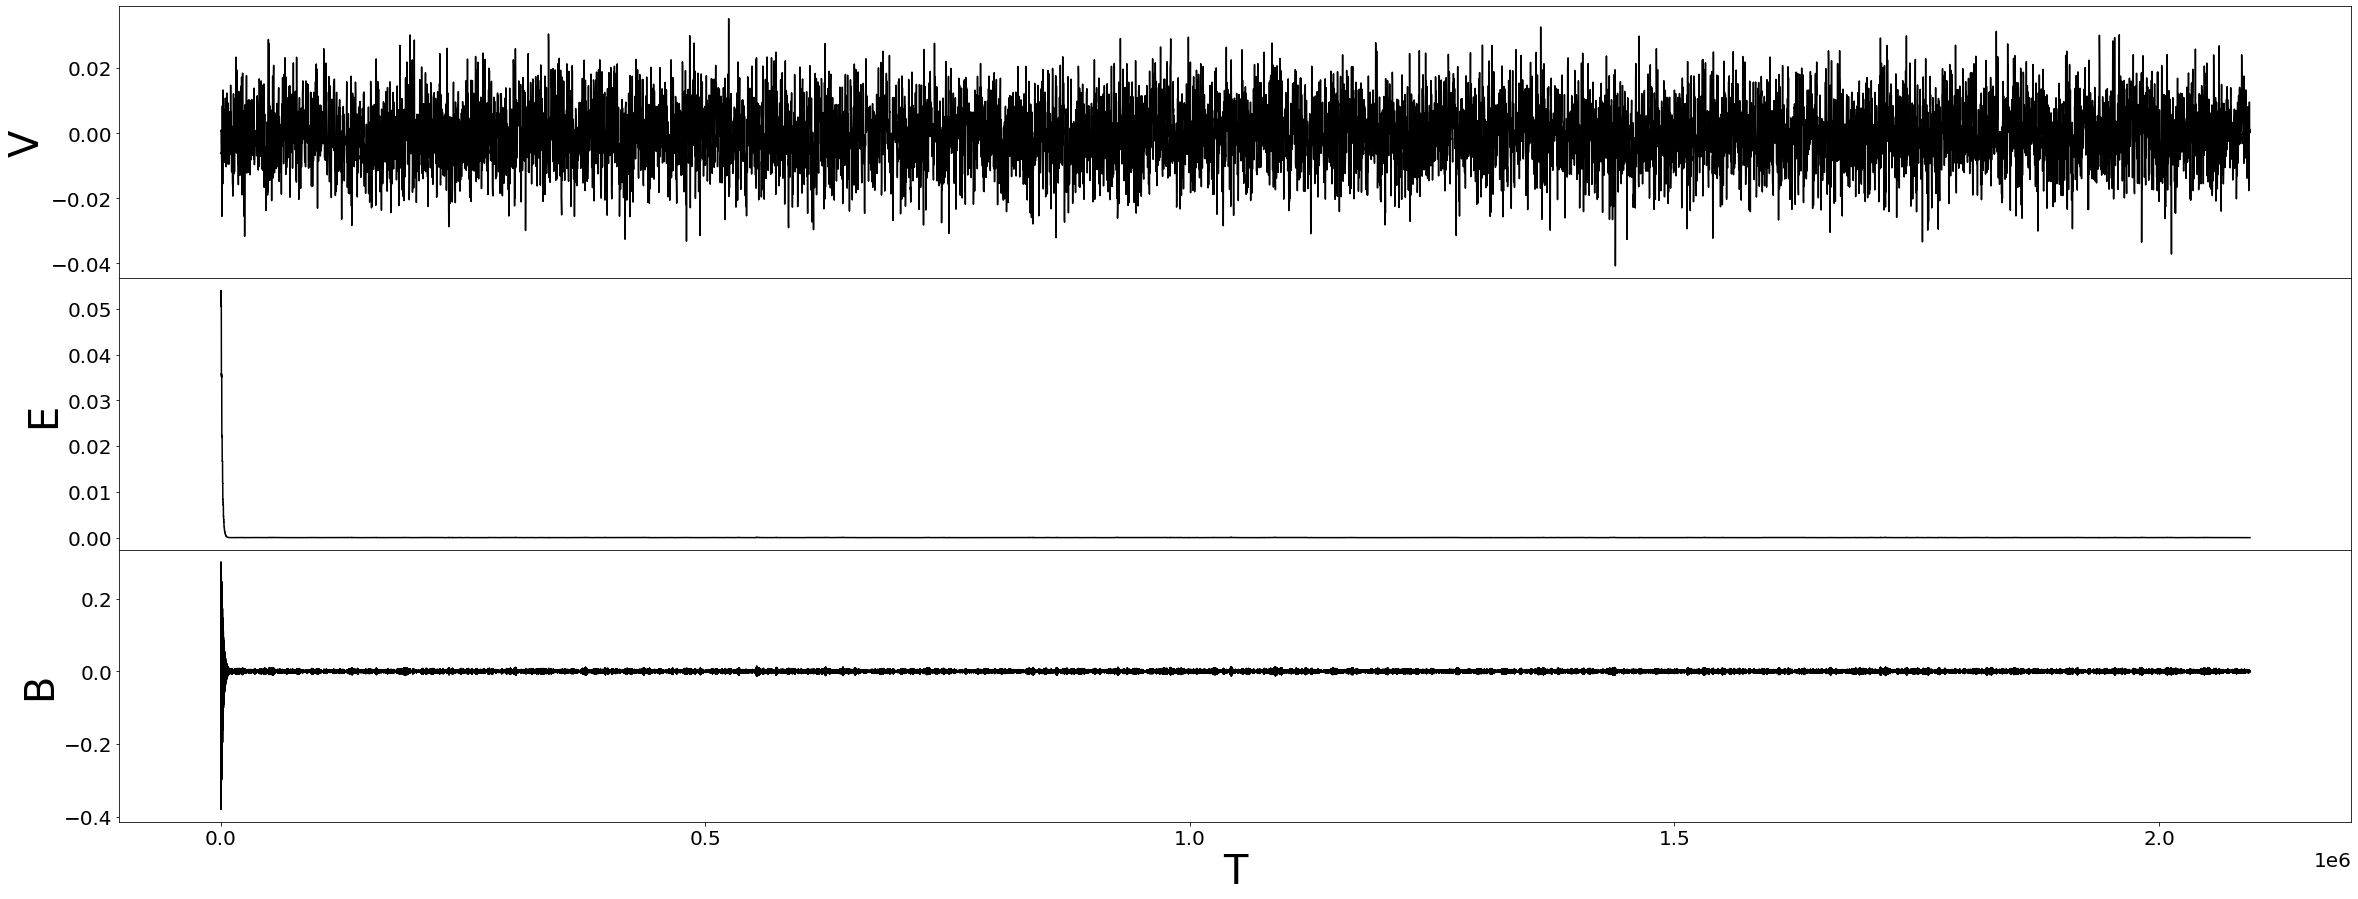

In [12]:
funplots(amptime4, E4, Amp4, V4, M4)

## Program Setup

In [2]:
# Import programs

import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import math

In [3]:
# Initialize constants for plots
num_bins = 200

axis_font = {'size':'40'}
title_font = {'size':'40'}

In [4]:
# Physical parameters
meandeltaT = np.pi
J = 300
dTau = 2 * np.pi / J
K = 1
N0 = 1
P0 = 0
eps = 0.1
std = 0.01
eqmean = 0
Tr = K * meandeltaT

In [5]:
# Initial conditions
initial_u = 0

## Functions

In [6]:
# function that generates an array of values of DeltaT, time b/t collisions
def fundeltaT(num_bins, M, dTau):
    deltaT = []
    
    rayleigh = np.random.rayleigh(meandeltaT, M)
    hist, bin_edges = np.histogram(rayleigh, bins = num_bins, density = True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    
    for i in range(M):
        r = np.random.rand(1)
        deltaTtemp = inv_cdf(r)

        if (deltaTtemp % dTau < 0.005):
            deltaTtemp2 = deltaTtemp - (deltaTtemp % dTau)
        else:
            deltaTtemp2 = deltaTtemp + dTau - (deltaTtemp % dTau)
        deltaT.append(deltaTtemp2)
    
    return deltaT

In [7]:
# Generating an array of values of V
def funV(std, deltaT, eqmean, Tr):
    V = []
    y1 = 0
    
    for i in range(len(deltaT) - 1):
        Tn = (deltaT[i] + deltaT[i + 1]/2)
        
        stdevt = ((1 - math.exp(-2 * Tn/Tr)) * std ** 2) ** (1/2)
        meant = eqmean + math.exp(-Tn / Tr) * (y1 - eqmean)
        
        y1 = np.random.normal(meant, stdevt, 2)[0]
        V.append(y1)
        
    return V

In [8]:
# generating array of values of B and E
def funB_E(Dstar, dTau, B, N0, P0, deltaT, M, eps, V, u):
    # created using Heun's method of integration 
        
    Amp = [B]
    t = 0.0
    amptime = [t]
    E = []
    
    for i in range (0, M - 1):
        
        for j in range(0, len(deltaT) - 1):
            m1 = u
            k1 = - (Dstar * u) - B  - (N0 * B**2) - (P0 * B**3)
            m2 = u + dTau * k1
            B_2 = B + dTau * m1
            u_2 = m2
            k2 = - Dstar * u_2 - B_2 - (N0 * B_2**2) - (P0 * B_2**3)
            m2 = u + dTau * k2
            t = t + dTau
            B += (dTau / 2) * (m1 + m2)
            u += (dTau / 2) * (k1 + k2)

            # include? needed in outer loop?
            if math.isnan(B) or abs(B) > 2:
                break

            Amp.append(B)
            amptime.append(t)
            E.append((1/2 * u**2) + (1/2 * B**2) + (1/3 * N0 * B**3) + (1/4 * P0 * B**4))
        
        V_i = V[i]
        dbdtf = u
        u = dbdtf + 2 * eps * (V_i - dbdtf)
    
    return Amp, amptime, E

In [9]:
def funplots(amptime, E, Amp, V, M):
    fig, axs = plt.subplots(3, 1, figsize=(40,15))
    fig.subplots_adjust(hspace=0) 
    
    axs[2].plot(amptime, Amp, 'k')
    axs[2].set_ylabel('B', **axis_font)
    axs[2].set_xlabel('T', **axis_font)
    axs[2].tick_params(axis = 'both', labelsize = 20)
    e1 = axs[2].xaxis.get_offset_text()
    if e1 != 0:
        e1.set_size(20)
    
    axs[1].plot(amptime[:len(E)], E, 'k')
    axs[1].set_ylabel('E', **axis_font)
    axs[1].tick_params(axis = 'y', labelsize = 20)
    e2 = axs[1].yaxis.get_offset_text()
    e2.set_size(20)
    
    axs[0].plot(amptime[::M], V, 'k')
    axs[0].set_ylabel('V', **axis_font)
    axs[0].tick_params(axis = 'y', labelsize = 20)
    
    plt.show()
